##Comentarios

En general, la aproximación inicial ofrece una buena caracterización de los datos, aunque presenta ciertas limitaciones en la metodología de validación.

El primer paso que se llevó a cabo fue, un set de validación  y no se reservaron datos específicos para realizar un test independiente, luego genraron validación cruzada. Es importante señalar que en una metodología típica se opta por una de estas dos estrategias (validación cruzada o conjunto de pruebas), no ambas.

Se podría haber explorado más a fondo la utilidad de la regularización para mejorar la precisión del modelo.


## puntaje 15/20

># **Parcial 1 Análisis Avanzado de Datos**
>### **Punto 3**
>
>
>
>
---


> Comenzamos importando las librerías que se necesitarán para el desarrollo del ejericio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scipy.stats import entropy
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

> ## **Actividad**
>
> Desarrollar el modelo de regresión para predecir el precio de venta de vehículos de una de las marcas específicas en el conjunto de datos LondonCars2014. Los predictores a considerar son kilometraje del vehículo y año ded fabricación. Se utilizará el Error Cuadrático Medio de la Raíz para evaluar el rendimiento.

> ## **Solución**

> **Selección de la marca**
>
>En este paso, cargamos los datos desde el archivo CSV y filtramos los registros correspondientes a la marca y modelo específicos (Nissan Altima S). Esto es importante porque estamos interesados en construir un modelo para esta refrencia en particular.

In [ ]:
# Cargamos el dataset
df = pd.read_csv('LondonCars2014.csv')
df.head()

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
0,Toyota,Avalon XLE,2014,4725,28995,Sedan,Gray,Black,6 Cyl,Automatic,4
1,Ford,Escape SE,2014,17201,24994,SUV,Silver,Black,4 Cyl,Automatic,4
2,Hyundai,Santa Fe Sport,2014,6279,25998,SUV,Silver,Gray,4 Cyl,Automatic,4
3,Ford,Escape SE,2014,16262,26684,SUV,Black,Black,4 Cyl,Automatic,4
4,Jeep,Grand Cherokee Limited Edition,2014,35572,33440,SUV,Black,Black,6 Cyl,Automatic,4


> Filtramos marca y modelo, y tomamos únicamente las columnas de los predictores y el precio_

In [ ]:
df_nissan = df[(df['Make'] == 'Nissan') & (df['Model'] == 'Altima S')]
df_nissan = df_nissan[['Mileage','Year','Price']]
df_nissan.head()

,Mileage,Year,Price
24,29483,2013,17768
41,5457,2013,17777
133,33047,2012,13995
151,33616,2012,16977
163,7301,2012,15996


> **Selección del modelo de regresión**
>
> Utillizamos la matriz de correlación para observar si hay una correlación fuerte entre las variables, esto sugerirá si el kilomatraje y el año son buenos predictores del precio de venta, lo que respalda la elección de estas características en el modelo de regresión que haremos más adelante.

In [ ]:
#df_corr = df_nissan.drop(["index"],axis=1)

In [ ]:
correlation_matrix = df_nissan.corr()

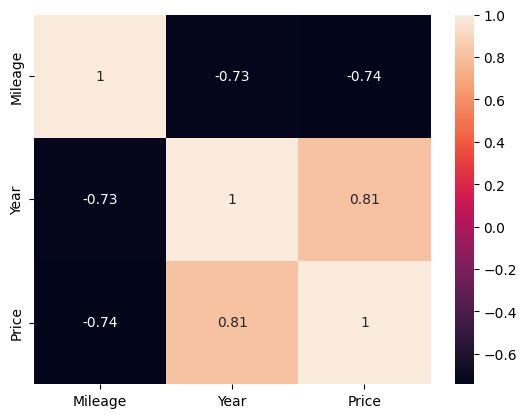

In [ ]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

> Realizamos un gráfico en 3D para explorar visualmente los datos y definir de manera preliminar que comportamiento parecen seguir

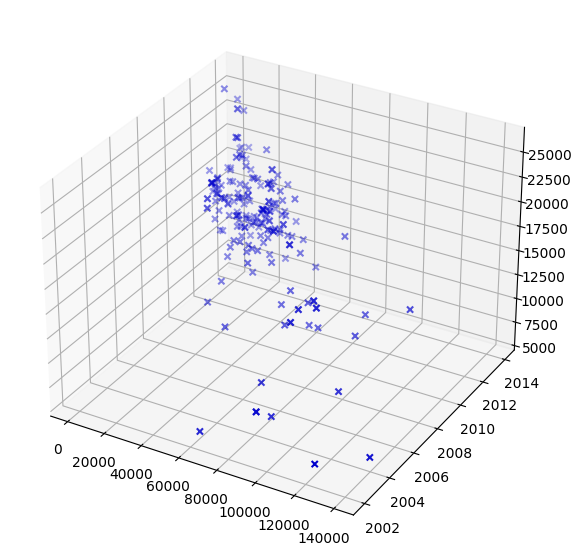

In [ ]:
x = df_nissan['Mileage']
y = df_nissan['Year']
z = df_nissan['Price']

fig = plt.figure(figsize= (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='mediumblue', marker='x')
plt.show()

> Como se puede observar, los puntos en el gráfico 3D siguen una tendencia lineal y forman lo que parece ser un plano en el espacio tridimensional, esto puede indicar una fuerte relación lineal entre las tres variables.

> **Implementación de regresión lineal**
>
> De acuerdo con los resultados anteriores, se decidió implementar un modelo de regresión lineal (ya que existe una alta correlación entre las variables). También se hicieron pruebas con *Ridge* y *Lasso*, sin embargo, se pudo concluir que utilizar un modelo con regularización no representa ningún cambio significativo, posiblemente debido a que el modelo es sencillo (solo tiene dos atributos de entrada, por tanto no se presentarán inconvenientes de colinealidad) lo que implica que todas las variables son relevantes.

> Seleccionamos las características (predictores) que utilizará el modelo, en este caso, "Kilometraje" y "Año de Fabricación", que se consideran claves para predecir el "Precio de Venta". También, definimos la variable objetivo, que es la que el modelo intentará predecir.

In [ ]:
# Variable objetivo
y = df_nissan["Price"]

# Variables de entrada
X = df_nissan
X = X.drop(["Price"],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 24 to 9035
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Mileage  197 non-null    int64
 1   Year     197 non-null    int64
dtypes: int64(2)
memory usage: 4.6 KB


> Dividimos los datos en conjuntos de entrenamiento y prueba para poder evaluar el rendimiento del modelo en datos no vistos. En este caso, usamos un 80% de los datos para entrenamiento y un 20% para prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=0,test_size=0.2, shuffle=True)

> En este caso, solo estamos utilizando dos predictores clave (kilometraje y año de fabricación) por lo cual la regresión lineal puede ser efectiva sin necesidad de métodos de regularización.

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print("score = ", regr.score(X_test, y_test))

score =  0.7290353209124912


> **Validación del modelo**
>
> Evaluamos utilizando RMSE

In [ ]:
y_pred = regr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 1743.0972557624732


> Podemos observar que se tiene un score bueno del 73% y que el RMSE de 1743.09 en comparación con el rango de precios (hasta $150,000 aproximadamente) sugiere que el error es relativamente bajo.
>
>Dado que ambos valores nos dicen que nuestro modelo es aceptaple ahora utilizaremos la **validación cruzada** para evaluar la robustez y generalización del modelo.

In [ ]:
# Tomamos los coeficientes de la regresión
coefs = np.array([regr.coef_[0],regr.coef_[1],regr.intercept_])
coefs

array([-3.28985062e-02,  1.07922222e+03, -2.15383353e+06])

> Vamos a utilizar *kfold* para hacer la validación cruzada. El uso de k = 5 en implica dividir los datos en cinco subconjuntos o "folds", lo que permite evaluar el modelo en diferentes conjuntos de prueba y entrenamiento en cada iteración. Esto es beneficioso para obtener una estimación robusta del rendimiento del modelo y detectar posibles problemas de sobreajuste. La elección de 42 ayuda a garantizar que el modelo se evalúe de manera imparcial en datos previamente mezclados. Finalmente, el cálculo del RMSE promedio proporciona una métrica unificada para evaluar la precisión del modelo, permitiendo una comunicación efectiva de su desempeño en datos no vistos.

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = cross_val_score(regr, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

mean_rmse = np.mean(rmse_scores)

print("RMSE promedio con", k, "-fold cross-validation:", mean_rmse)

RMSE promedio con 5 -fold cross-validation: 1731.2231547948566


> El RMSE es significativamente menor que el valor máximo de precio de venta (150.000), lo que indica que, en promedio, las predicciones del modelo tienden a estar dentro de un rango razonable de error en relación con el rango de precios de los vehículo.

> **Resultados y conclusiones**
>
> Por último, graficaremos el plano obtenido al realizar la regresión

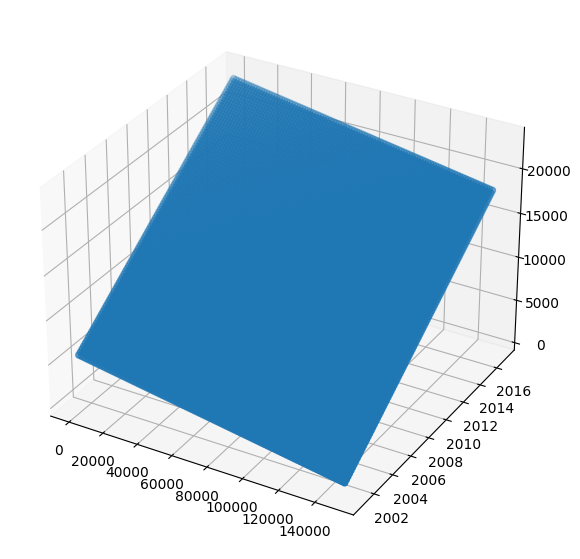

In [ ]:
x_points = np.linspace(0, 150000, 100)
y_points = np.linspace(2001, 2017, 100)

xcoor, ycoor = np.meshgrid(x_points, y_points)
eq = coefs[0]*xcoor + coefs[1]*ycoor + coefs[2]

fig = plt.figure(figsize= (7,7))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xcoor, ycoor, eq)

plt.show()

> Podemos concluir que:
> * Es importante entender el conjunto de datos, relación entre variables y atributos poco significativos para determinar si la regularización representa un cambio grande en el modelo.
> * Cross-validation proporciona una estimación más confiable del modelo y permite identificar si este está sobreajustado, ya que realiza varias divisiones entre los datos.